In [7]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("Country_clusters.csv")
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [8]:
df1= pd.get_dummies(df)
df1

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,44.97,-103.77,False,False,False,False,False,True,True,False,False
1,62.40,-96.80,False,True,False,False,False,False,True,False,False
2,46.75,2.40,False,False,True,False,False,False,False,True,False
3,54.01,-2.53,False,False,False,False,True,False,True,False,False
4,51.15,10.40,False,False,False,True,False,False,False,False,True
5,-25.45,133.11,True,False,False,False,False,False,True,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


<Axes: xlabel='Latitude', ylabel='Longitude'>

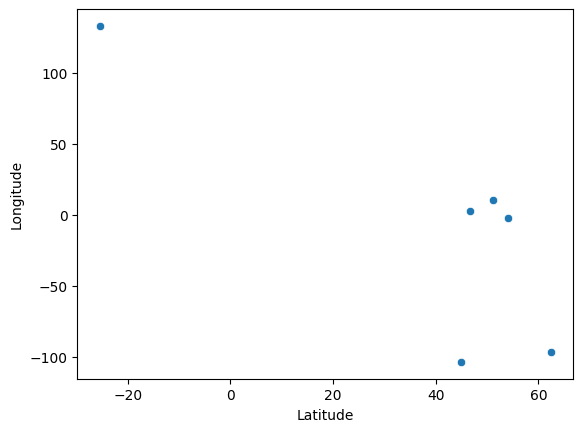

In [10]:
sns.scatterplot(x = df['Latitude'], y=df['Longitude'])


In [16]:
numeric_df=df.select_dtypes(include=[int,float])
std_scalar = StandardScaler()
x=numeric_df
array = std_scalar.fit_transform(x)
x = pd.DataFrame(array, columns=x.columns)
x


,Latitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


In [19]:
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
std_scalar = StandardScaler()

# Applying the scaler to the 'Latitude' and 'Longitude' columns
array = std_scalar.fit_transform(df1[['Latitude', 'Longitude']])

# Creating a DataFrame with the scaled values
x_scaled = pd.DataFrame(array, columns=['Latitude', 'Longitude'])

# Concatenating the scaled columns back with the rest of the dataset
x = pd.concat([x_scaled, df1.drop(['Latitude', 'Longitude'], axis=1)], axis=1)

# Display the final DataFrame
x.head()


,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,0.204344,-1.193114,False,False,False,False,False,True,True,False,False
1,0.798128,-1.104870,False,True,False,False,False,False,True,False,False
2,0.264983,0.151062,False,False,True,False,False,False,False,True,False
3,0.512308,0.088645,False,False,False,False,True,False,True,False,False
4,0.414877,0.252347,False,False,False,True,False,False,False,False,True


In [20]:
kmean_model = KMeans(n_clusters=3)
y_pred = kmean_model.fit_predict(x)
y_pred

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [21]:
x['Traget'] = y_pred
x

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German,Traget
0,0.204344,-1.193114,False,False,False,False,False,True,True,False,False,0
1,0.798128,-1.104870,False,True,False,False,False,False,True,False,False,0
2,0.264983,0.151062,False,False,True,False,False,False,False,True,False,1
3,0.512308,0.088645,False,False,False,False,True,False,True,False,False,1
4,0.414877,0.252347,False,False,False,True,False,False,False,False,True,1
5,-2.194639,1.805930,True,False,False,False,False,False,True,False,False,2


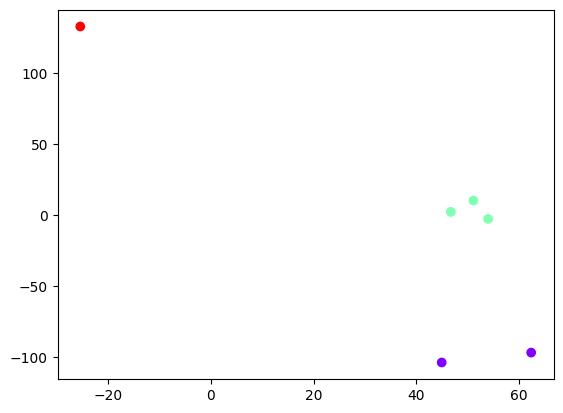

In [22]:
plt.scatter(x = df['Latitude'], y= df['Longitude'], c= y_pred, cmap='rainbow')